# Why do we need to explore and clean our data?

Exploratory data analysis - Why and the what?
Why - understand the shape of the data, learn features might be useful, inform the cleaning that will come next
What - counts or distribution of each feature and all variables, data type for each feature, missing data, correlations and duplicates.
Get data to take you to where to go with a few constraints

Data cleaning - why and whay?
ML is not magic - algorithms that respond to a systematic way to the data you give it. Its important to produce a waulity model.
Why - shape data so model can pick up on the signal, remove irrelevant data, adjust features to be acceptable for the model.
What - anonimyize data - data security is regulated. If there is any personal data needs to made anonymous if data isnt pblically available. Encode categorical variables, fill in missing data, prune or scale data to accounr doe variables.



# Exploring continous features

Exploratory data analysis with just continous variables - high level exploration then next part we will plot.
Going to use the titanic data set - commonly used for machien learning
When ship sank, there were not a lot of life boats, some people were more likely to survive than others


In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline



In [41]:
titanic = pd.read_csv(r"C:\Users\mmje5\Desktop\Coding Self Taught\Applied Machine Learning - Foundations\Ex_Files_Applied_Machine_Learning\Exercise Files\titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
#this is public info so all the personal data is okay
#name, passenger id and ticket arent going to be useful so we are going to drop them
#sex, cabin and embarked are all none numeric features, so to keep it clean will be removed, will go over this later in the section
cat_feat = ['PassengerId', 'Name', 'Ticket', 'Sex', 'Cabin', 'Embarked'] #list fo all features to be dropped
titanic.drop(cat_feat, axis=1,inplace=True ) # axis = 1 means columns dropped not (0 is rows), inplace means dont make new dataframe

In [43]:
titanic.head()
#now we only have continous features

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [44]:
#describe method gives you info on the data
titanic.describe()
#age - count is 714 (missing values with age)
#survived value is binary, so mean value gives you the percentage that survived
#P class - only a first class, a second class and a 1st class

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
#find which features may indicate survival, one way to do that is to use thr group by feature and find average for other values
titanic.groupby('Survived').mean() # two groups, those who survived and those who did not
#age has missing values - are the values missing at random or missing in a systematic way (shows you how to handle it)

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [46]:
titanic.groupby(titanic['Age'].isnull()).mean()
#age = true means missing
#can theorize 

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


# Plotting continous features 

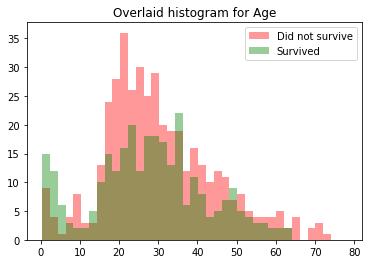

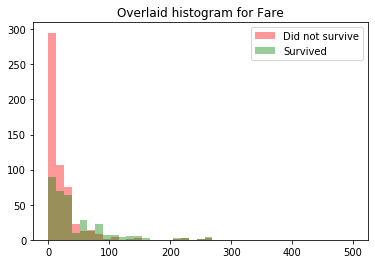

In [47]:
#plot overlayed histograms to understand distributon of variables
#so last time average age for survival was 28.3 for did and 30.6
#age and fair are continous variables - rest or ordinal (catgaories with clear boundaries)
for i in ['Age', 'Fare']:
    died = list(titanic[titanic['Survived'] == 0][i].dropna()) ##grab none missing values for died and survived
    survived = list(titanic[titanic['Survived'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(min(died), max(survived))
    width = (xmax - xmin)/ 40
    sns.distplot(died, color = 'r', kde = False, bins=np.arange(xmin,xmax,width)) #plt two lists on an overlaid histogram
    sns.distplot(survived, color = 'g', kde = False, bins=np.arange(xmin,xmax,width))
    plt.legend(['Did not survive', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

In [48]:
#averages not much difference between those who survived and those who did not
#big difference to those who survived - to those who did not

<Figure size 432x288 with 0 Axes>

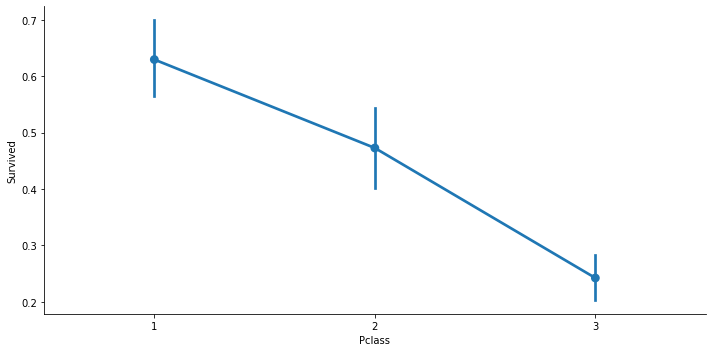

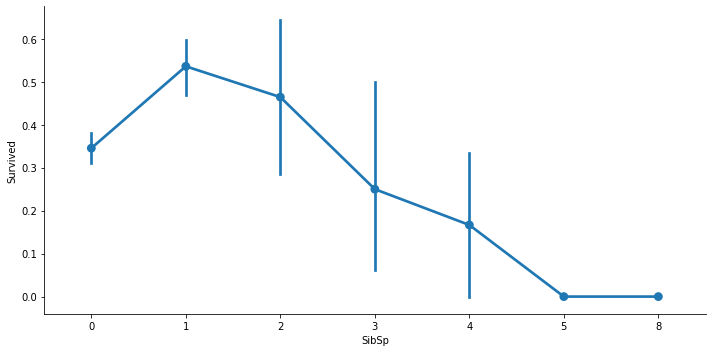

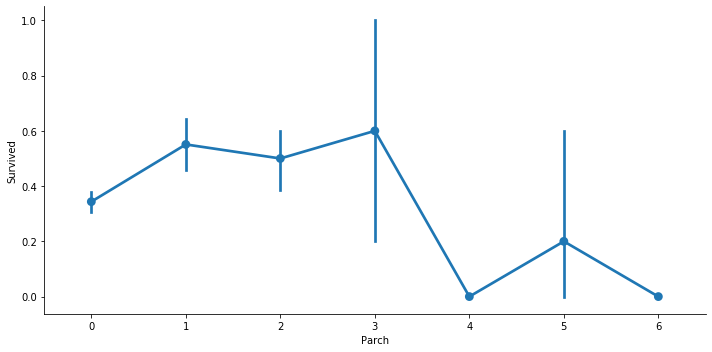

In [49]:
#catagorical plot - plot survival rate for each features
for i, col in  enumerate(['Pclass', 'SibSp', 'Parch']): #enumerate will return index of the list and then return item in the list
    plt.figure(i)
    sns.catplot(x =col, y='Survived', data=titanic, kind = 'point', aspect = 2)
    #percent of people that survived at each of the level per catgeory

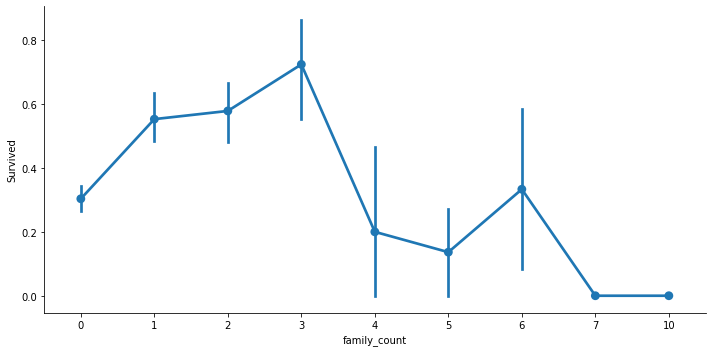

In [50]:
titanic['family_count'] = titanic['SibSp'] + titanic['Parch']
sns.catplot(x ='family_count', y='Survived', data=titanic, kind = 'point', aspect = 2)

# Continous Data Cleaning

In [51]:
import pandas as pd
titanic = pd.read_csv(r"C:\Users\mmje5\Desktop\Coding Self Taught\Applied Machine Learning - Foundations\Ex_Files_Applied_Machine_Learning\Exercise Files\titanic.csv")
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
#Drop irrelevent continous vairable
titanic.drop('PassengerId',axis=1,inplace=True)


In [53]:
titanic.groupby(titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [54]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)
titanic.isnull().sum() # checking for the where the null values are

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [55]:
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [56]:
#Sibsp & Parch - represented the number in a family - shoudl combine these
titanic['family_cnt'] = titanic['SibSp'] + titanic['Parch']
#multi colinearity - variables represent the same thing and therefore a model would find it 
titanic.drop(['SibSp', 'Parch'], inplace = True, axis = 1)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


## Exploring categorical features

In [59]:
#different approaches for continous feature and categorical features, drop all the ID and continous features
import pandas as pd
titanic = pd.read_csv(r"C:\Users\mmje5\Desktop\Coding Self Taught\Applied Machine Learning - Foundations\Ex_Files_Applied_Machine_Learning\Exercise Files\titanic.csv")
cont_feat = ['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare']
titanic.drop(cont_feat, axis=1,inplace=True)
titanic.head()

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


In [61]:
#now we all we are left with is our catgeorical features and taget variable
titanic.info() #get number of variables and types
#cabin and embarked have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Survived    891 non-null int64
Sex         891 non-null object
Ticket      891 non-null object
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


In [62]:
titanic.groupby(titanic['Cabin'].isnull()).mean()
#will only return survived field as a mean as its continous
#so 66% of a missing cabin value survived and then 30% when its missing
#normally when you have a lot of missing you would drop it, but here it impacts the target variable

,Survived
Cabin,
False,0.666667
True,0.299854


In [63]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)

In [64]:
titanic.head()

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_ind
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0


## Plotting categorical features

<Figure size 432x288 with 0 Axes>

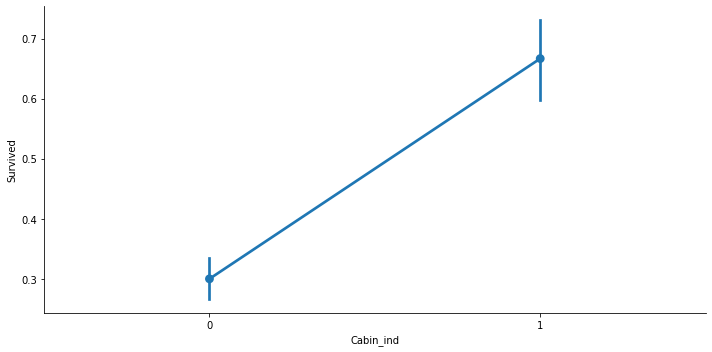

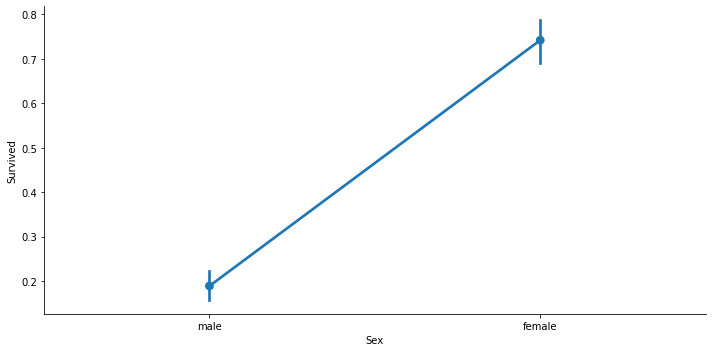

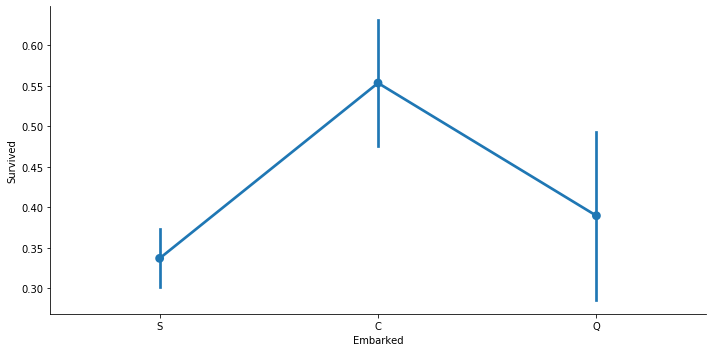

In [65]:
for i, col in  enumerate(['Cabin_ind', 'Sex', 'Embarked']): #enumerate will return index of the list and then return item in the list
    plt.figure(i)
    sns.catplot(x =col, y='Survived', data=titanic, kind = 'point', aspect = 2 )

In [66]:
#70% of women survived
#apparenlty where they boarded impacts the survival rate,but will this impact survived - did more men board at some locations
#to check hypotheses we could use pivot tables
titanic.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')
#count number of men and women who boarded at each location

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [68]:
titanic.pivot_table('Survived', index='Cabin_ind', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_ind,,,
0,99,73,515
1,69,4,129


## Categorical data cleaning

In [76]:
titanic = pd.read_csv(r"C:\Users\mmje5\Desktop\Coding Self Taught\Applied Machine Learning - Foundations\Ex_Files_Applied_Machine_Learning\Exercise Files\titanic.csv")
cont_feat = ['Name', 'Ticket']
titanic.drop(cont_feat, axis=1,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [78]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_ind
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,female,35.0,1,0,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,0


In [81]:
gender_num = {'male': 0, 'female': 1} # create a dictionary to map gender to a number
titanic['Sex'] = titanic['Sex'].map(gender_num) # use map to replace gender with bianry values and then replace it to itself
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_ind
0,1,0,3,NaN,22.0,1,0,7.2500,NaN,S,0
1,2,1,1,NaN,38.0,1,0,71.2833,C85,C,1
2,3,1,3,NaN,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,NaN,35.0,1,0,53.1000,C123,S,1
4,5,0,3,NaN,35.0,0,0,8.0500,NaN,S,0


In [82]:
titanic.drop(['Cabin','Embarked'], axis=1,inplace=True)